In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

plt.close('all')

In [4]:
###############################################################################
#            Toy dataset
###############################################################################

n_samples = 1000
n_features = 100
n_iter = 1000  # number of iterations
gamma = 0.005  # suggested step size


def gamma(t):
    return 1. / (100 + t)

X_toy = np.random.randn(n_samples, n_features)
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target)


# Initialize w with just zeros
w_ini = np.zeros(X_toy.shape[1] + 1)

loss = 'mse'
# loss = 'hinge'  # QUESTION 4


In [82]:

############################################################################
#                Stochastic gradient
############################################################################


def decision_function(X, w):
    """ fonction de prediction a partir d'un vecteur directeur"""
    return np.dot(X, w[1:]) + w[0]


def predict(X, w):
    """ fonction de prediction de classe a partir d'un vecteur directeur"""
    return np.sign(decision_function(X, w))


def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",
                        alpha=0, average=False):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2) + alpha/2 * np.linalg.norm(w)**2
            gradient = X[idx] * (X[idx] @ w - y[idx])
        elif loss == "hinge":
            gradient = 0.0; # QUESTION 11
            raise NotImplementedError('QUESTION 11')
        
        if average is True:
            raise NotImplementedError('QUESTION 9')

        if alpha > 0:
            gradient += alpha*w
        
        w -= gamma_func(t) * gradient
        
        all_w[t] = w
    return w, all_w, pobj, np.dot(X,w)

In [84]:
w_ini_toy = np.zeros(X_toy.shape[1] + 1)

In [85]:
w, all_w, pobj, pred = stochastic_gradient(X_toy, y_toy, 0.01, 500, w_ini_toy, alpha=0.005)

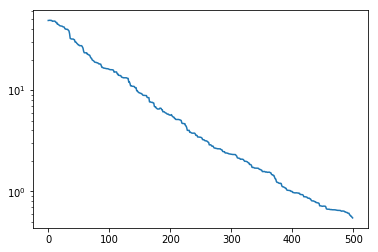

In [59]:
plt.semilogy(pobj)

In [60]:
pobj[-1]

0.5459990519732784

In [70]:
X_iris, y_iris = X, y

In [73]:
y_iris.shape

(100,)

In [76]:
w_ini = np.zeros(X_iris.shape[1] + 1)

In [100]:
w, all_w, pobj, pred = stochastic_gradient(X_iris, y_iris, 0.01, 500, w_ini, alpha=0)

In [101]:
# plt.plot(pred)
# plt.plot()

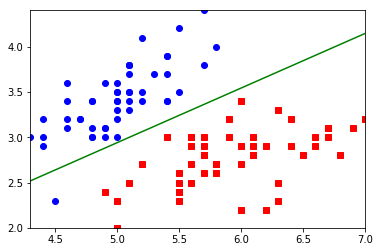

In [102]:
plot_2d(X_iris, y_iris, w)